In [1]:
# IMPORT
import random
import numpy as np
from utils.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

#PLOT SETTINGS
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#AUTO RELOAD MODULES
%load_ext autoreload
%autoreload 2

In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'datasets/cifar'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

In [3]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# Renormalize
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

In [4]:
from base.svm import svm

# Set SVM classifier
classifier = svm(3073,10)
W = np.random.rand(3073,10)*0.0001

# Compute loss and gradient
loss,grad = classifier.loss(W,X_dev,y_dev,0.00001)
print 'loss: %f, grad total: %f' % (loss,np.min(grad))

loss: 9.111674, grad total: -55.747935


In [5]:
# Check
from cs231n.gradient_check import grad_check_sparse

# Compute the loss and its gradient at W.
loss, grad = classifier.loss(W, X_dev, y_dev, 0.0)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with your analytically computed gradient. The numbers should match
# almost exactly along all dimensions.
f = lambda w: classifier.loss(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

# do the gradient check once again with regularization turned on
# you didn't forget the regularization gradient did you?
loss, grad = classifier.loss(W, X_dev, y_dev, 1e2)
f = lambda w: classifier.loss(w, X_dev, y_dev, 1e2)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 24.920663 analytic: 24.920663, relative error: 2.420685e-13
numerical: -6.349626 analytic: -6.349626, relative error: 3.551944e-12
numerical: -6.207731 analytic: -6.207731, relative error: 4.962240e-12
numerical: -13.773791 analytic: -13.773791, relative error: 1.525802e-12
numerical: 8.176965 analytic: 8.176965, relative error: 1.757465e-12
numerical: 20.538580 analytic: 20.538580, relative error: 1.539068e-12
numerical: 9.184618 analytic: 9.184618, relative error: 1.450059e-12
numerical: -5.352406 analytic: -5.352406, relative error: 8.149730e-12
numerical: 20.531816 analytic: 20.531816, relative error: 1.053088e-12
numerical: 5.993234 analytic: 5.993234, relative error: 2.092243e-12
numerical: 25.320923 analytic: 25.320923, relative error: 1.776994e-13
numerical: 4.284648 analytic: 4.284648, relative error: 2.412375e-12
numerical: -8.012817 analytic: -8.012817, relative error: 3.796432e-12
numerical: 10.528577 analytic: 10.528577, relative error: 1.198739e-13
numerical: -

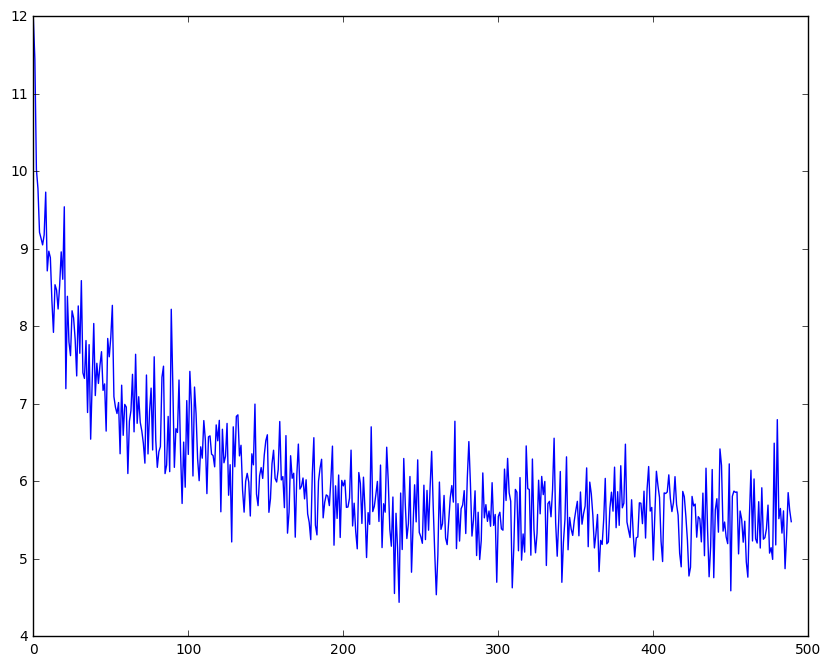

In [5]:
# Set up Support Vector Machine Classifier
classifier = svm(X_train.shape[1],10)
loss_hist = classifier.train(X_train,y_train,learning_rate=1e-7,reg=57142)
plt.plot(loss_hist)

In [6]:
y_pred = classifier.predict(X_test)
acc = classifier.accuracy(y_pred,y_test)
print("Current Accuracy: "+str(acc*100))

Current Accuracy: 36.5


In [7]:
# SET UP CLASSIFIER
classifier = svm(X_train.shape[1],10)
learning_rates = np.linspace(1e-8, 5e-6,8)
regularization = np.linspace(5e4,1e5,8)
learn_array = []
reg_array = []

# INVESTIGATE LEARNING RATES
for learn in learning_rates:
    losses = classifier.train(X_train,y_train,learning_rate=learn,batch_size=100)
    y_pred = classifier.predict(X_test)
    acc = classifier.accuracy(y_pred,y_test)
    learn_array.append(acc)
    
# INVESTIGATE REGULARIZATION
for reg in regularization:
    losses = classifier.train(X_train,y_train,reg=reg,batch_size=100)
    y_pred = classifier.predict(X_test)
    acc = classifier.accuracy(y_pred,y_test)
    reg_array.append(acc)

# PRINT RESULTS
print("Optimal Learning Rate: "+str(learning_rates[np.argmax(learn_array)]))
print("Optimal Regularization: "+str(regularization[np.argmax(reg_array)]))

Optimal Learning Rate: 1e-08
Optimal Regularization: 50000.0


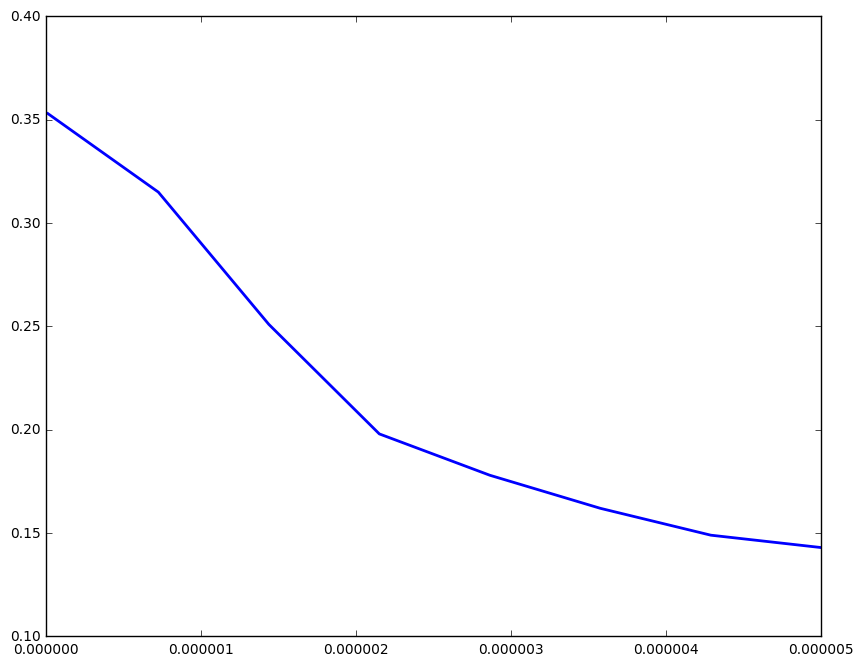

In [8]:
plt.plot(learning_rates,learn_array,linewidth=2.0)

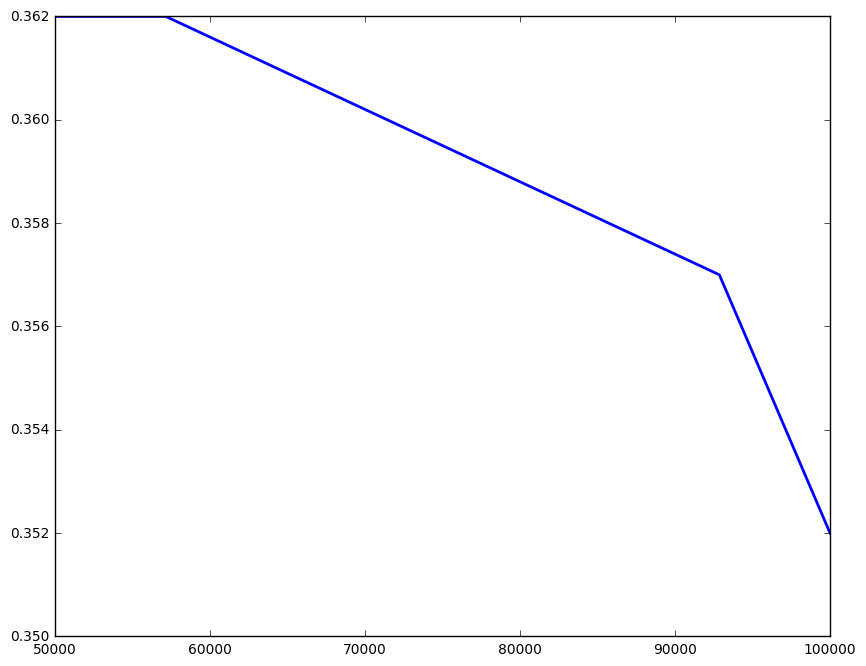

In [9]:
plt.plot(regularization,reg_array,linewidth=2.0)

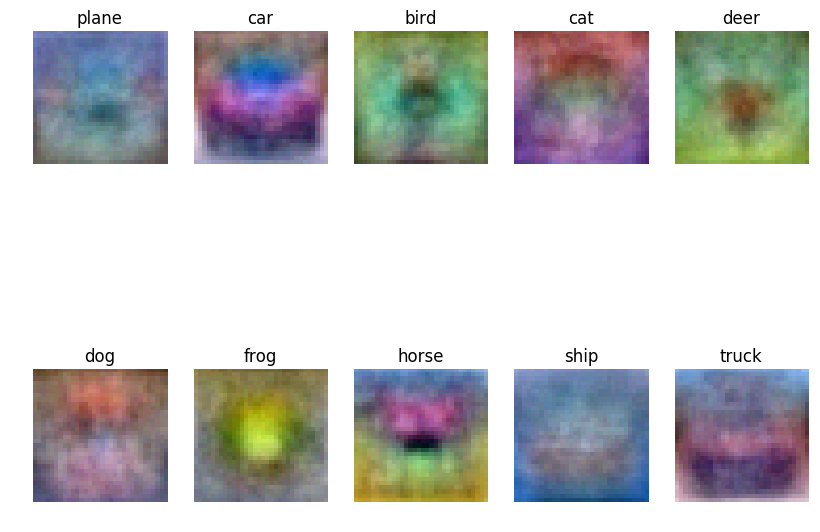

In [10]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.
best_svm = svm(X_train.shape[1],10)
loss = best_svm.train(X_train,y_train)
w = best_svm.model[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in xrange(10):
  plt.subplot(2, 5, i + 1)
    
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])